<a href="https://colab.research.google.com/github/sidratul343/Mammogram-Classification/blob/main/Mammogram_Classification%20in%20google%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification using deep learning model developed by ablation study on pre-processed mammography images

In this study, we will be showcasing a computer vision classification problem using mammograms. The dataset we have used can be downloaded from https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM. It consists of four classes:

* Benign Calcification
* Benign Mass
* Malignant Calcification
* Malignant Mass

Therefore, this is a multi-class classification problem. The images containes artifacts and noises which may cause reducing model's performance. Hence, artifacts and noises are removed and images are enhanced by adjusting overall brightness and contrast. After pre-processing the images, the dataset is augmented as the number of images were not sufficient for a deep learning model. Finally, the model is developed using ablation study by altering several components and hyper parameters of CNN architecture.

**The figure below showcases examples of four classes of this dataset**

![biology-10-01347-g002-550.jpg](attachment:biology-10-01347-g002-550.jpg)

## Installing software and files

To work with computer Vision, we need to install some softwares and files.In this regard, we will be doing all the implementations in Python language on jupyter notebook. To install jupyter notebook and launch other application and files at first we have to download Anaconda which is free.

Link to Download Anaconda : https://www.anaconda.com/?modal=nucleus-commercial

Guideline for installing Anaconda : https://www.geeksforgeeks.org/how-to-install-anaconda-on-windows/

Once Anaconda is downloaded and installed successfully, we may proceed to download Jupyter notebook.

## Download and Install Jupyter Notebook


Link to download Jupyter using Anaconda : https://docs.anaconda.com/ae-notebooks/4.3.1/user-guide/basic-tasks/apps/jupyter/

More informations : https://mas-dse.github.io/startup/anaconda-windows-install/

Guideline to use Jupyter notebook : https://www.dataquest.io/blog/jupyter-notebook-tutorial/


## Installing Python libraries and packages

Most Used Python libraries for image-processing

* OpenCV
* Scikit-Image
* Pillow/PIL
* NumPy
* Pandas etc
* Matplotlib


To import and use the packages, we need pip or conda. For now we will be using pip. Using pip on Anaconda command prompt these packages can be installed.

**More information**

Downloading pip : https://phoenixnap.com/kb/install-pip-windows

Install Python packages from Anaconda Prompt using pip : https://datatofish.com/how-to-install-python-package-in-anaconda/

Once the packages are installed, you can use them by importing on Jupyter Notebook.


Python libraries for Data Science (how to import on notebook) : https://neptune.ai/blog/image-processing-python-libraries-for-machine-learning

**** Every Time you restart jupyter notebook, you have to import the libraries again****


## Read, display and write image

To read an write an image from folder python's Opencv or Pillow can be used, Note that if you read an image using Opencv you have to write the image using opencv as well and same goes for Pillow.

To apply Opencv or Pillow we have to import them first.

## Using Opencv

In [ ]:
import cv2

read_img_dir = r'D:\breast\Benign_Calc\BenignCalc\PNG0000.png'  #input image directory

read_img = cv2.imread(read_img_dir)

cv2.imshow('Window',read_img)  #display image

cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\img_1.png',read_img) #output image directory

cv2.waitKey(0)

True

To learn more about the parameters and how the functions work, visit https://learnopencv.com/read-display-and-write-an-image-using-opencv/

## Using Pillow

In [ ]:
from PIL import Image

read_img_dir = r'D:\breast\Benign_Calc\BenignCalc\PNG0000.png'  #input image directory

read_img = Image.open(read_img_dir) 

read_img.save(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\img_2.png')  #output image directory

To learn more about the parameters and how the functions work, visit https://pillow.readthedocs.io/en/stable/reference/Image.html

## Reading and writing all images from directory

In [ ]:
folder = r"input folder"
j=1
for im in os.listdir(folder):
    path = os.path.join(folder,im)
    img = cv2.imread(path)
    cv2.imwrite(os.path.join(r'output folder', 'image name '+str(j)+'.jpg'),img)
    j = j+1

## Reading and writing specific number of images from directory

Here showed how to work with 15 images from directory.

In [ ]:
folder = r"input folder"
image number = 15
j=1
for im in os.listdir(folder):
    path = os.path.join(folder,im)
    img = cv2.imread(path)
    cv2.imwrite(os.path.join(r'output folder', 'image name '+str(j)+'.jpg'),img)
    j = j+1
    if j == image number
    break

## Image Processing

Several algorithms are used for artifacts and noise removal and pixel enhancement.

**Artifacts Removal**

* Binary Masking
* Morphological Opening
* Largest Contour Detection
* Houghline Transformation

**Image Enhancement**

* Gamma Correction
* CLAHE-1st
* CLAHE-2nd
* Green Fire Blue (ImageJ Filter)

## Binary Masking

We find some images with thin white border either on the top, bottom, left or right side. Cropping images using a ratio could remove the border but the images would be resized as well. Hence, binary masking is applied with a rectangular mask.

To learn more 

* https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/
* https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html
* https://machinelearningknowledge.ai/learn-to-draw-rectangle-in-opencv-python-with-cv2-rectangle-with-examples/

**Figure below showes the Thin borders of the mammograms, (a) border at top, (b) border at left, and (c) border at bottom**

![biology-10-01347-g004-550.jpg](attachment:biology-10-01347-g004-550.jpg)


In [ ]:
### Import necessary libraries 

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageEnhance

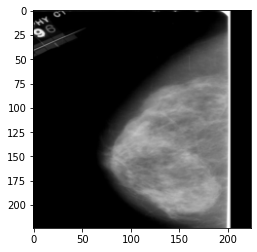

In [ ]:
### Read and show raw image

path = r'C:\Users\DCL\OneDrive\Documents\others\tutorial\a.png'
raw_img= cv2.imread(path,0) #read in gray scale format

plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
### Remove boarder of raw image to isolate the breast part from image boarder

#give directory of raw image

raw_img= cv2.imread(path,0)
mask = np.zeros(raw_img.shape, np.uint8)            
mask = cv2.rectangle(mask, (2, 2) , (222, 222), (255,255,255), 5) # creating the binary mask
mask = cv2.flip(mask,1)
mask = cv2.bitwise_not(mask)
boarder_removed = cv2.bitwise_and(raw_img, mask)

# save boarder removed image to directory
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\border_removed.jpg',boarder_removed)

True

The cv2.rectangle () method is used to create a rectangular mask of the same dimensions as our input image. This method requires five parameters, input_image, start_point, end_point, border_color and border_thickness. Input_image is the image to which the mask will be applied, start_point refers to the starting coordinates of the rectangular mask (x and y coordinates), end_point represents the end coordinates of the rectangular mask (x and y coordinates), border_color is the color of the border, and border_thickness is the thickness of the border.

The thickness of the binary mask = 5 px so that the border is removed without losing any necessary pixels. After creating the mask, a bitwise_AND is performed to apply the mask on original images. Bitwise AND requires two parameters, the original image and the binary mask. For any bit presented in the input, the output bit will be 0 if the mask bit is 0.

## Morphological Opening 


Morphological Opening is one of the morphological operations which is applied to remove small noise and artifacts from an image and smooth the border of targeted larger object.

To learn more

* https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

* https://medium.com/swlh/image-processing-with-python-morphological-operations-26b7006c0359


In [ ]:
# Performing morphological opening operation to minimize artefacts

# Give directory to boarder_removed image
path1 = r'C:\Users\DCL\OneDrive\Documents\others\tutorial\border_removed.jpg'
boarder_removed = cv2.imread(path1,0)
kernel = np.ones((20,20),np.uint8)
ret,thresh1 = cv2.threshold(boarder_removed,0,255,cv2.THRESH_BINARY)
mask_open = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
boarder_open = cv2.bitwise_and(boarder_removed, mask_open)

# save boarder_open image to directory
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\opening.jpg',boarder_open)

True

**The step by step process of morphological opening can be seen in the figure below**
![stack%20opening.png](attachment:stack%20opening.png)

                   1                             2                             3                           4

In this figure:

* image 1 = original image

* image 2 = binary image with a threshold value of 0-255 using cv2.threshold (noise and artifacts are visible)

* image 3 = noise and artifact free binary mask using cv2.morphologyEx (after applying morphological opening)

* image 4 = output of merging image 3 and image 1 (cv2.bitwise_and)

In this process, after reading an image with opencv, it is formated into grayscale format. After that, the image is binarized using cv2.threshold so that  all the pixel values turn into 0 and 1.
It is found that for a kernel size of (20, 20), results in the optimal outcome. The algorithm is applied using the cv2.morphologyEx function. Along with kernel size, this function requires another parameter, type of morphological operation. As morphological opening is applied, cv2.MORPH_OPEN is used. Thus, the noises are removed from the binarized image and the noise-free mask is then merged with the original image with the help of bitwise_AND function.


## Largest Contour Detection

After the completion of morphological opening, some images still contain large artefacts that the morphological opening could not remove. We therefore use another approach named largest contour detection to extract only the breast portition. Using openCV, contours can be detected marked and the largest contour can be extracted using cv2.findContours, cv2.drawContours and max functions.

To learn more

* http://www.learningaboutelectronics.com/Articles/How-to-find-the-largest-or-smallest-object-in-an-image-Python-OpenCV.php
* https://learnopencv.com/contour-detection-using-opencv-python-c/

In [ ]:
### Extract Breast portion of image

# give directory to boarder_open image
path = r'C:\Users\DCL\OneDrive\Documents\others\tutorial\opening.jpg' # image after applying morphological opening
original = cv2.imread(path)
boarder_open = Image.open(path) 

img_brightness_obj=ImageEnhance.Brightness(boarder_open)
enhanced_img=img_brightness_obj.enhance(8)

img  = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_BGR2RGB)
image_contours = np.zeros((original.shape[1], original.shape[0], 1), np.uint8)
image_binary = np.zeros((original.shape[1], original.shape[0], 1), np.uint8)

for channel in range(original.shape[2]):
        ret, image_thresh = cv2.threshold(img[:, :, channel], 127, 255, cv2.THRESH_BINARY)    
        contours = cv2.findContours(image_thresh, 1, 1)[0]   
        cv2.drawContours(image_contours, contours, -1, (255,255,255), 3)  
        
contours = cv2.findContours(image_contours, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cv2.drawContours(image_binary, [max(contours, key = cv2.contourArea)],-1, (255, 255, 255), -1)
rgb_img = cv2.cvtColor(image_binary, cv2.COLOR_GRAY2RGB)

largest_contour = cv2.bitwise_and(original,rgb_img)


# save largest_contour image to directory
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\largest_contour.jpg',largest_contour)


True

**The step by step process of extracting largest contour can be seen in the figure below**

![largest.jpg](attachment:largest.jpg)

In this figure:

* image 1 = original image

* image 2 = artifact free binary mask using after extracting the largest contour 

* image 3 = output of merging image 2 and image 1 (cv2.bitwise_and)

## Hough Line Transform

![largest_contour.jpg](attachment:largest_contour.jpg)

As can be seen from this image a bright thin line is attached to the breast contour. This is an unnecessary region which can be removed using Hough Line Transform. Hough Line Transform can detect any shape,using given parameters, even if it is broken or distorted.

To learn more : https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [ ]:
### remove bright lines

img1=cv2.imread(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\largest_contour.jpg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
m=np.max(img1)
n=255
l=int(m-60)
    
white = (n,n,n)
black = (0,0,l)
mask = cv2.inRange(img, black,white)

cv2.imwrite(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\inRange_mask.jpg", mask)

img0 = cv2.imread(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\largest_contour.jpg',0)
img = cv2.imread(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\inRange_mask.jpg",0)
edges = cv2.Canny(img,50,150,apertureSize = 3)
try:
    lines = cv2.HoughLines(edges,1,np.pi/50,50)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img0,(x1,y1),(x2,y2),(0,0,255),4) 
        
        cv2.imwrite(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\line removed.jpg",img0)
        
        edges = cv2.Canny(img0,50,150,apertureSize = 3)
        try:
            lines = cv2.HoughLines(edges,1,np.pi/50,50)
            for rho,theta in lines[0]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(img0,(x1,y1),(x2,y2),(0,0,255),10) 

            cv2.imwrite(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\line removed.jpg",img0)
        
        except:
            cv2.imwrite(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\line removed.jpg",img0)
        
except:
    cv2.imwrite(r"C:\Users\DCL\OneDrive\Documents\others\tutorial\no line.jpg",img0)

**The step by step process of Hough Line Transform can be seen in the figure below**
![stack%20contour.jpg](attachment:stack%20contour.jpg)

In this figure:

* image 1 = original image

* image 2 = extracted bright line to be removed using Hough Line Transform

* image 3 = output applying Hough Line Transform on original image using image 2

## Image Enhancement

## Gamma Correction

Gamma Correction is an image enhancement technique that adjusts the overall brightness and contrast of an image. By altering this gamma value, the optimal brightness and contrast can be acquired in order to detect objects more precisely.

In this process, after reading an image with opencv, it is formated into grayscale format. Using the function of np.array gamma correction is applied.

To learn about Gamma Correction in details check the paper https://www.mdpi.com/2079-7737/10/12/1347

To learn Gamma Correction about the functions and parameters visit https://pyimagesearch.com/2015/10/05/opencv-gamma-correction/#:~:text=There%20are%20two%20(easy)%20ways,range%20%5B0%2C%20255%5D

In [ ]:
read_img_dir = r"C:\Users\DCL\OneDrive\Documents\others\tutorial\line removed.jpg"  #input image directory

read_img = cv2.imread(read_img_dir)

g = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)  #GRAYSCALE format

gamma = np.array(255*(g / 255) ** 2.0, dtype = 'uint8')  # applying gamma correction using value = 2

cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gamma.png',gamma) #output image directory


True

You can see the amazing transformation below using a gamma value of 2. The left image is before applying gamma correction and the right image is after applying gamma correction. 

Here,

gamma value > 1 means brightening.

gamma value = 1 means no effect.

gamma value < 1 means darkening.


However, a particular gamma may not be suitable for any dataset. The suitable value can be chosen by testing with a few gamma value with the images.

**Tranformation after applying gamma correction**

![gamma%20stack.png](attachment:gamma%20stack.png)

## Contrast limited adaptive histogram equalization (CLAHE)

CLAHE is an image enhancement technique which is used to improve the visibility level of image or video.

In this process, after reading an image with opencv, it is formated into grayscale format. Using the function of cv2.createCLAHE CLAHE is applied. There are two paramaters in this function, which can be altered and tested with different values to get the optimal output.

In this step, we will be applying CLAHE twice as in this process, the Region of interest (ROI) gets visible more.

**For more explanation** 

* https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

* https://pyimagesearch.com/2021/02/01/opencv-histogram-equalization-and-adaptive-histogram-equalization-clahe/

* https://www.mdpi.com/2079-7737/10/12/1347


In [ ]:
### Apply CLAHE (2 times) on artefacts_removed gamma images

path = r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gamma.png'
img = cv2.imread(path,0)

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
clahe_1 = clahe.apply(img)
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\clahe_1.png',clahe_1)

clahe_2 = clahe.apply(clahe_1)

cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\clahe_2.png',clahe_2)


True

**The step by step process of applying CLAHE can be seen in the figure below**
![clahe%20stack.png](attachment:clahe%20stack.png)

In this figure:

* image 1 = image after applying gamma correction

* image 2 = after appying CLAHE on image 1

* image 3 = oafter appying CLAHE on image 2

## Green Fire Blue (ImageJ Filter)

Using ImageJ software You can display, annotate, edit,  measure, analyze, process, print, and save image data. There are several filters which can be applied to highlight ROI from the surronding pixels.

The software can be downloaded from here https://imagej.en.softonic.com/download

For more Information visit https://imagej.nih.gov/ij/download.html

After installing the software, you will a page like this will be appeared.

![imj1.png](attachment:imj1.png)

Several options can be seen here such as File, Edit, Image, process etc. You may explore the options with an image to see how they work. For now will be sticking with Green Fire Blue (ImageJ Filter). By clicking on the **File** option an image can be loaded from computer directory.

![IMJ4.png](attachment:IMJ4.png)

Afterwards, Go to option **Image --> Lookup tables**



![IMJ3.png](attachment:IMJ3.png)

On **Lookup Tables** you can see several image filter. By testing the filters with image, the suitable one can be selected. For now, we will apply **Green Fire Blue**

![IMG5.png](attachment:IMG5.png)

It can be seen how **Green Fire Blue** filter highlighted the ROI in a different pixel value from surronding tissues.

The last step is saving the image on directory. you can save image in any format such as .png, .jpeg etc. See the image below.

![IMG6.png](attachment:IMG6.png)

## Image Augmentation

We employ seven augmentation methods on the pre-processed dataset to increase the number of images:

* vertical flipping
* horizontal flipping
* horizontal-vertical flipping
* rotating 30°
* rotating 30°-horizontal flip
* rotating −30°
* rotating −30°-horizontal flip


Learn more

* https://www.thepythoncode.com/article/image-transformations-using-opencv-in-python
* https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/


In [ ]:
import imutils

path = r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb.png'
img = cv2.imread(path)

    
    #0 means flipping around the x-axis 
    #positive value 1 means flipping around y-axis. 
    #Negative value (for example, -1) means flipping around both axes.
    
f1= cv2.flip(img,0) # vertical flipping
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f1)

f2= cv2.flip(img,-1) # horizontal flipping
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 2.png',f2)

f3= cv2.flip(img,1) # horizontal-vertical flipping
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f3)

f4 = imutils.rotate(img, angle=30) #custom rotation ang - rotating 30°
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f4)

f5 = imutils.rotate(f1, angle=30) #custom rotation ang - rotating 30°-horizontal flip
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f5)

f6 = imutils.rotate(img, angle= 330) #custom rotation ang - rotating −30°
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f6)
f7 = imutils.rotate(f1, angle= 330) #custom rotation ang - rotating −30°-horizontal flip
cv2.imwrite(r'C:\Users\DCL\OneDrive\Documents\others\tutorial\gfb 1.png',f7)
      

True

After applying the above transformation, for a single image seven transformed images will be obtained.

![biology-10-01347-g017-550.webp](attachment:biology-10-01347-g017-550.webp)

## Dataset Split

Next step is splitting the dataset into train, validation and test to train the model. The commonly used splitting rations are

* train:val:test = 70:20:10, 80:,10:10, 70:10:20 etc.

For our study, we will split the dataset using a ration of train:val:test = 70:10:20 using python's splitfolders library. All you have to do is

* import library
* define the input folder directory containing all the four classes
* define an empty output folder directory
* define the ratio

splitfolder will automatically create three folder named train, val and test on your output directory and save the images there after splitting.

To learn more : https://pypi.org/project/split-folders/

In [ ]:
import splitfolders

input_folder="input dataset directory containing all the four classes"


output="output directory"


splitfolders.ratio(input_folder, output, seed=42, ratio=(.70, .10, .20))

## Model Building

As our dataset is pre-processed and augmented, the final step is classification of the diseases using deep learning. We will employ a CNN model to classify. A CNN model is mainly consists of Convolutional layer, maxpool layer, Flatten layer and Fully Connected layer. 
To know more about CNN architecture visit:

* https://www.upgrad.com/blog/basic-cnn-architecture/
* https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
* https://www.analyticsvidhya.com/blog/2020/10/what-is-the-convolutional-neural-network-architecture/

You can build a CNN architecture using Keras library of Python:

* https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
* https://www.analyticsvidhya.com/blog/2021/06/building-a-convolutional-neural-network-using-tensorflow-keras/

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

If the libraries can not be imported, you have to install first using pip that we have already discussed.

After importing the libary, we have to define the input image size and the number of classes. in this case we have defined

* input_shape=(224, 224, 3)
* class_num = 4

First we will construct a base CNN model with randomly applied number of layers and other hyper-parameters. Later, step by step we will apply ablation study altering different components of the base model to improve accuracy. Finally, the optimal model configuration will be generated based on highest performance.


In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 128)     73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 107, 107, 64)      73792     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 105, 105, 32)      18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 50, 50, 32)      

In this architecture, we have nine convolution layer, four maxpool layer, one flatten layer, one dropout layer, one dense layer and one fully connected (FC) layer. See the below example ov convolution layer:

**model.add(Conv2D(128,(3,3),activation='relu'))**


* 128 = number of kernels
* (3,3) = size of kernels
* activation='relu'

**model.add(MaxPool2D(2,2))**

* MaxPool2D = type of pooling layer
* (2,2) = size of kernels

**model.add(Flatten())**

* Flatten() = type of flatten layer

**model.add(Dense(1024,activation='relu'))**

* Dense(1024,activation='relu') = Dense layer with 1024 neorons and relu activation function

**model.add(Dropout(0.5))**

* Dropout(0.5) = Dropout layer with value of 0.5

**model.add(Dense(class_num,activation ='softmax'))**

* class_num = number of classes in the dataset
* activation ='softmax' = 'softmax' activation function for FC layer (final classification)

In ablation study process, we will alter all of these components to improve performance.

However, let's compile the model first.

In [ ]:
op = tf.keras.optimizers.Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

Here,

* tf.keras.optimizers.Adam(lr=0.001) = optimizer Adam and learning rate, lr=0.001

* loss ='categorical_crossentropy' = loss function is categorical_crossentropy. This is mostly used in multi-class classification problem.

However, in ablation study process, we will alter all of these components as well.

Now, let's load the training_set, val_set and test_set using ImageDataGenerator. To learn more about ImageDataGenerator visit https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator. 

You can see inside ImageDataGenerator a few augmentation code is given. These augmentation techniques can be changed to improve accuracy. To learn more visit https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip= True,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training directory',               #training dataset
                                                 target_size = (224,224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                 seed=1,
                    
                                                )

val_set = val_datagen.flow_from_directory('validation directory',           #validation dataset
                                            target_size = (224,224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('test directory',           #test dataset
                                            target_size = (224,224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


model.optimizer.get_config()

Here,

* batch_size = 64
* class_mode = 'categorical'

which also can be changed while conducting ablation study.


**We are done with everything now. Let's train the model**

In [ ]:
filepath = 'weight.h5'


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')



log_csv = CSVLogger('weight.csv', separator=',', append=False)
    
callbacks_list = [checkpoint1,log_csv]


r = model.fit_generator(
    training_set,
    epochs=300,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

While training, Keras saves the model in .h5 format  store the weights and model configuration in a single file. To learn more https://www.tensorflow.org/guide/keras/save_and_serialize. 

ModelCheckpoint is used to save the configuration for which highest vakidation accuracy is achieved. To learn more https://keras.io/api/callbacks/model_checkpoint/.

CSVLogger is used to save the train and validation accuracy, time per epoch in a csv file. To learn more https://keras.io/api/callbacks/csv_logger/

The epoch number can be changed based on model's performance.

After starting training the model, you will see something like this:

![train.png](attachment:train.png)

Later loss and accuracy curves are derived to detect any overfitting issue occuring while training. These plots also tells how accuracy is improved over the epochs.

To learn more https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
### Plot accuracy and loss curve

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


Final step is deriving the test accuracy. To know about test accuracy visit https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/

In [ ]:
model.load_weights("weight.h5")
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

## Ablation study

The aim of the ablation study is to acquire a clear understanding of the model’s performance by analyzing the consequence of altering some components. With the alteration of different components or hyper parameters of a model, a change performance is observed. This method can ascertain any potential decrease in the performance of the model which can later be fixed by updating and tuning the network.

We have trained our base CNN model several times by altering layer numbers, filer sizes filer numbers, hyper-parameters and parameter values to obtain an optimal performance.

**1. changing convolution and maxpool layer**

from the base model, the number of convolution and maxpool layer can be decreased and increased to observe the performance. For our case, for the configuration of four convolution and four maxpool layer the highest performance is achieved. The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


**2. changing number of kernels of convolution layers**

from the base model, the number of convolution kernel can be decreased and increased to observe the performance. For our case, for the configuration of kernel number **16-->32-->32-->64** the highest performance is achieved. The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


**3. changing kernel size of convolution layers**

from the base model, the convolution kernel size can be decreased and increased to observe the performance. For our case, for kernel size (2,2) the highest performance is achieved. The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu''))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


**4. changing activation function of convolution layers**

Five activation functions,PReLU, ReLU, Leaky ReLU, Tanh and Exponential Linear Units (ELU) are experimented where PRelu performs best with our dataset. The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(2,2),activation='PReLU',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='PReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


**5. changing the type of pooling layer**

Two pooling layers, maxpool and average pool, are evaluated where both pooling layers gained almost same accuracy. Hence, we keep maxpool layer to move forward. The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(2,2),activation='PReLU',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='PReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()


**6. changing flatten layer**

We experimented with Global Max pooling and Global Average pooling flatten layer and found that the previously used flatten layer yielded the highest test accuracy.

The architecture is given below.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(2,2),activation='PReLU',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='PReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()

**7. Changing Loss Functions**

Experimentation with different loss functions, namely Binary Crossentropy, Categorical Crossentropy, Mean Squared Error, Mean Absolute Error, Mean Squared Logarithmic Error and Kullback Leibler Divergence was carried out to select the appropriate loss function for our network. While equipped with Categorical Crossentropy the model gained highest test accuracy. Hence this is chosen. 

In [ ]:
op = tf.keras.optimizers.Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)


**8. Changing Optimizer**

Experimentation with different optimizers namely Adam, Nadam, SGD, Adamax and RMSprop is carried out to identify the optimal optimizer and found that Nadam yields the highest accuracy.

In [ ]:
op = tf.keras.optimizers.Nadam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)


**9. Changing Learning Rate**

Experimentation with different Learning Rates, 0.001, 0.0001, 0.0008, 0.006 is carried out to identify the optimal optimizer and found that 0.0008 yields the highest accuracy.

In [ ]:
op = tf.keras.optimizers.Nadam(lr=0.0008)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)


**9. Changing batch size**

Experimentation with different batch size, 16,32,64 is carried out to identify the optimal optimizer and found that 32 yields the highest accuracy.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip= True,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training directory',               #training dataset
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed=1,
                    
                                                )

val_set = val_datagen.flow_from_directory('validation directory',           #validation dataset
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('test directory',           #test dataset
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')


model.optimizer.get_config()

## Optimal Model Architecture

Finally, This is our optimal model configuration with highest accuracy after applying ablation study of nine cases.

In [ ]:
class_num = 4

model = Sequential()


model = Sequential()
model.add(Conv2D(16,(2,2),activation='PReLU',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='PReLU'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(1024,activation='PReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()




op = tf.keras.optimizers.Nadam(lr=0.0008)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)




train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip= True,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training directory',               #training dataset
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 seed=1,
                    
                                                )

val_set = val_datagen.flow_from_directory('validation directory',           #validation dataset
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('test directory',           #test dataset
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')


model.optimizer.get_config()



# Happy Learning!